# Regression with and Decomposition of GMMs

Regression of density distributions in feature space can be done using Gaussian Mixture Models (GMMs). Below we show an example of how to do that. This is followed by the comparison of obtained GMMs to discover underlying patterns, which we refer to as _decomposition_. Decomposition turns out to be useful for the classification of effects such as crystal defects.

In [1]:
%matplotlib notebook
import numpy as np
from scipy import interpolate, spatial, stats, special, optimize
import itertools, warnings, copy
import matplotlib.pylab as plt
from sklearn import linear_model, utils, preprocessing
import sklearn
import atomtoolbox as atb

from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

E:\Programs\Anaconda3\envs\py35\lib\site-packages\ase\lattice\spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


## 1. Sampling from Density Distributions in Feature Space

In [2]:
m = {"0":[0,1], "1":[1,2,4,5,6], "2":[2,3]}
mp = atb.get_decomposed_models(m)
print("mp ",mp)

mp  [array([4, 5, 6]), array([3]), array([1]), array([0]), array([2])]


<IPython.core.display.Javascript object>


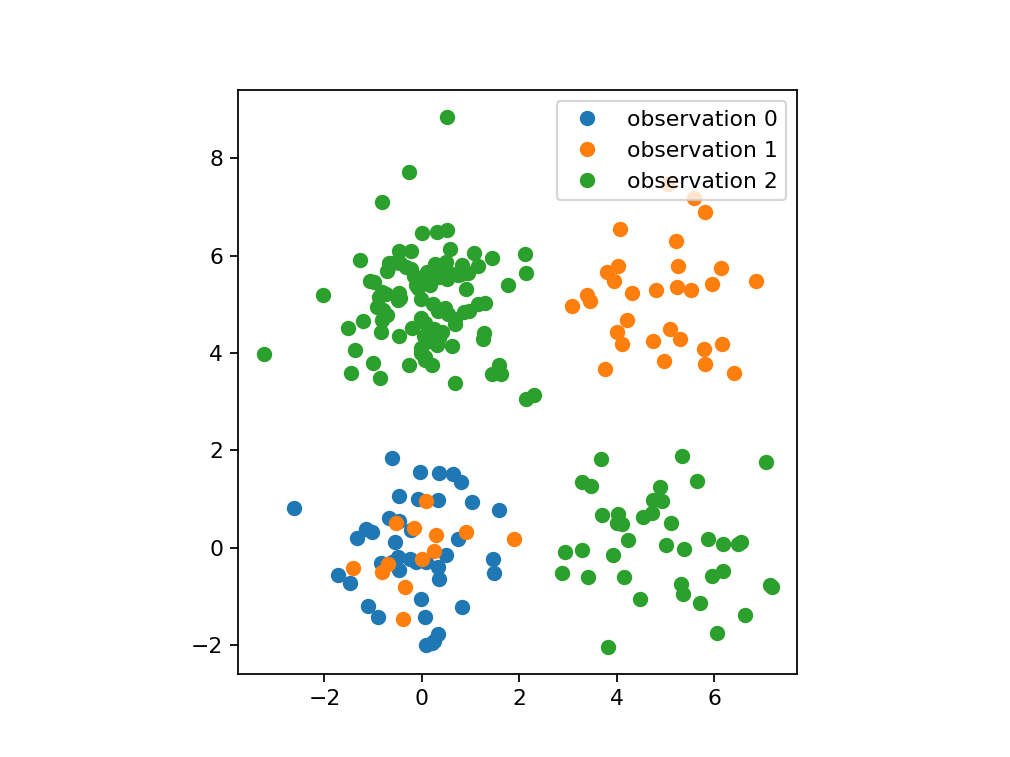

In [3]:
# list of means and covariances
means = [np.array([0,0]),
         np.array([5,5]),
         np.array([0,5]),
         np.array([5,0]),]
covs = [np.array([[1,0],[0,1]]),
        np.array([[1,0],[0,1]]),
        np.array([[1,0],[0,1]]),
        np.array([[1,0],[0,1]])]

# Gausians for each observation
idx_dis = [[0],[0,1],[2,3]]

# number of samples for each observation and the respective Gaussian
Nsamples = [[42],[13,31],[101,40]]

all_Phis = [np.vstack([stats.multivariate_normal(mean=means[_ix], cov=covs[_ix]).rvs(size=_N) for _ix,_N in zip(ix,N)])\
       for ix,N in zip(idx_dis,Nsamples)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect("equal")
for i,Phi in enumerate(all_Phis):
    ax.plot(Phi[:,0],Phi[:,1],'o',label="observation "+str(i))
plt.legend(loc=0)
plt.show()

## 2. Regressing Density Distributions in Feature Space and Decomposing

<IPython.core.display.Javascript object>


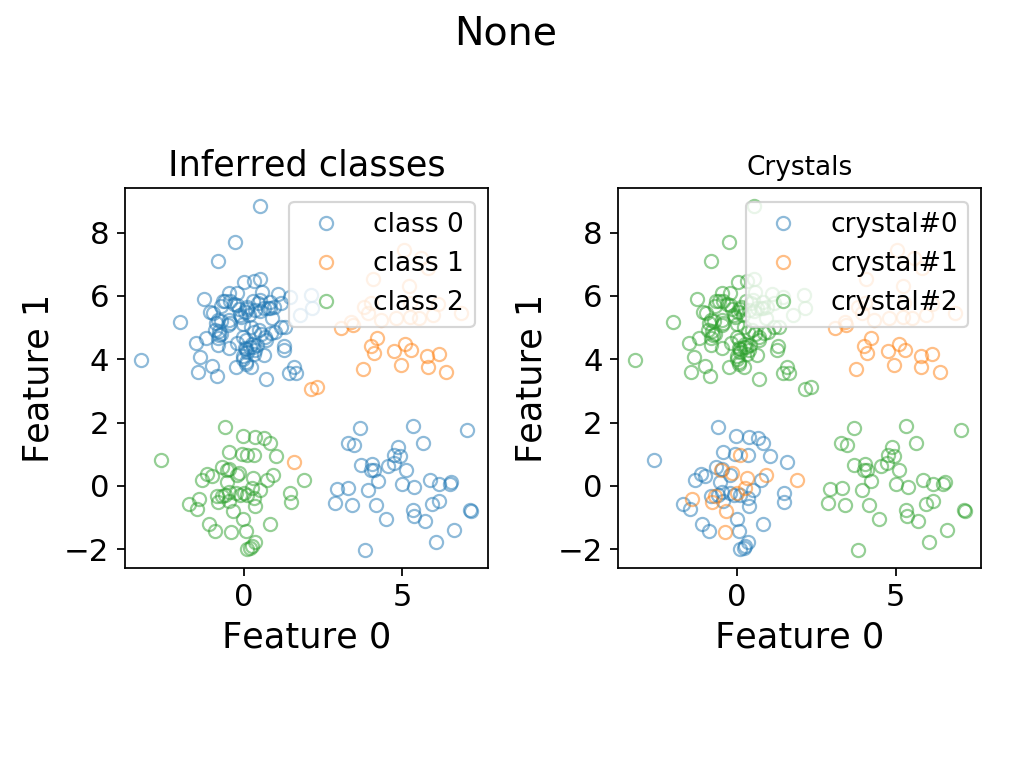

<IPython.core.display.Javascript object>


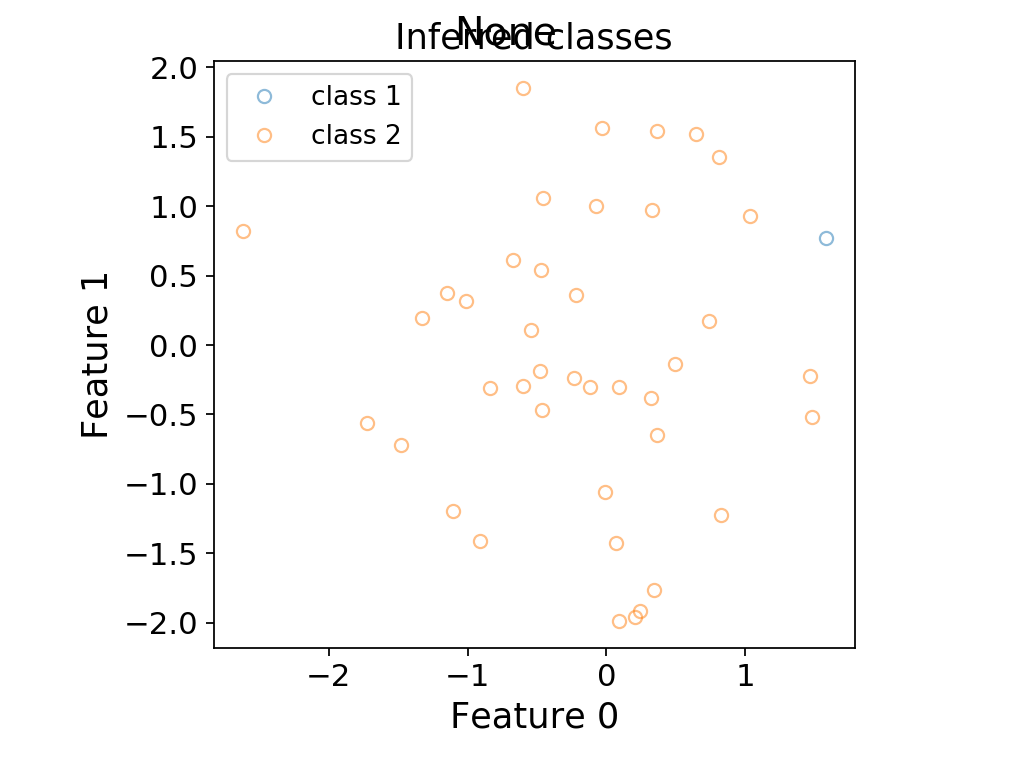

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [8]:
# choose mixture class
vgmm = BayesianGaussianMixture(n_components=5, weight_concentration_prior=1., 
                               covariance_type="full")
# initialize the classifier class with the chosen mixture class
gmc = atb.GaussianMixtureClassifier(gmm=vgmm)
# fitting the mixtures for all observations
#gmc.fit(Phi_train, t_train, label_map=label_map)
#gmc.fit(all_Phis_train, None, label_map=None)
gmc.fit(all_Phis, None, label_map=None)
gmc.predict(all_Phis, show=True, show_kwargs=dict(xlim=None, ylim=None))
gmc.predict(all_Phis[0], show=True, show_kwargs=dict(xlim=None, ylim=None))